In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import sqlite3
import dateutil.parser as parser
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
#Connect to Database
DBName = '../Data/yelp_project.db'
conn=sqlite3.connect(DBName)
cursor = conn.cursor()

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())

[(u'business',), (u'review',), (u'user',)]


In [4]:
#Get businesses in Pittsburgh
query = "SELECT business_id FROM business WHERE CAST(postal_code AS int)>=15000 AND CAST(postal_code AS int)<15500"
business = pd.read_sql_query(query, conn)
business

,business_id
0,cnGIivYRLxpF7tBVR_JwWA
1,P3LisOj7DktgGa7C5FYpnA
2,93otbGHE0s0m-lU1osvg9w
3,csdZolWIWvkIHIqsCmV6sg
4,kdjrQ2tuY4eqo4JZWIx50Q
5,h7ZW6c1Vi9V6_-gd2Ch_4g
6,CO7TpBuNFr_K0MTRaf9prw
7,HWrbZS1mxVRj2Y2VwMmDMg
8,jDqaz1jKdeWk_fTVCzc1Pg
9,HYwbHY-srAOoH-t337DpMw


In [5]:
query = "SELECT review_id, business_id, review.stars, date, neighborhood FROM business JOIN review USING (business_id) WHERE business_id IN ({0});".format(query)
reviews = pd.read_sql_query(query, conn)
reviews

,review_id,business_id,stars,date,neighborhood
0,BDFCs211lOig02HBD65_BQ,cnGIivYRLxpF7tBVR_JwWA,5,2016-07-04,None
1,Pj7C4vR1qkk6dh2LRVOMTg,cnGIivYRLxpF7tBVR_JwWA,1,2016-02-01,None
2,hSCDti62aRBJu9wctXeJkA,cnGIivYRLxpF7tBVR_JwWA,5,2016-08-06,None
3,lCEHqw5SXxcioiIeV5PIOQ,cnGIivYRLxpF7tBVR_JwWA,5,2016-07-28,None
4,13qtXUUt8b0qhn28et8PvQ,P3LisOj7DktgGa7C5FYpnA,1,2015-09-19,West View
5,5sYUCZsIw3Z6bQVZvfrNkA,P3LisOj7DktgGa7C5FYpnA,5,2014-01-12,West View
6,Ane45CiMPV3LxDqi1FqlqA,P3LisOj7DktgGa7C5FYpnA,5,2015-03-20,West View
7,QMl1xWoNXU88gwbA0pUC9g,P3LisOj7DktgGa7C5FYpnA,5,2011-11-19,West View
8,fsw3TYEMws91bhrrEMKMsQ,P3LisOj7DktgGa7C5FYpnA,2,2014-01-29,West View
9,lR8hCB3MEBFkTGGKokDTmw,P3LisOj7DktgGa7C5FYpnA,5,2016-01-15,West View


In [6]:
reviews_year = [parser.parse(x).year for x in reviews.date]

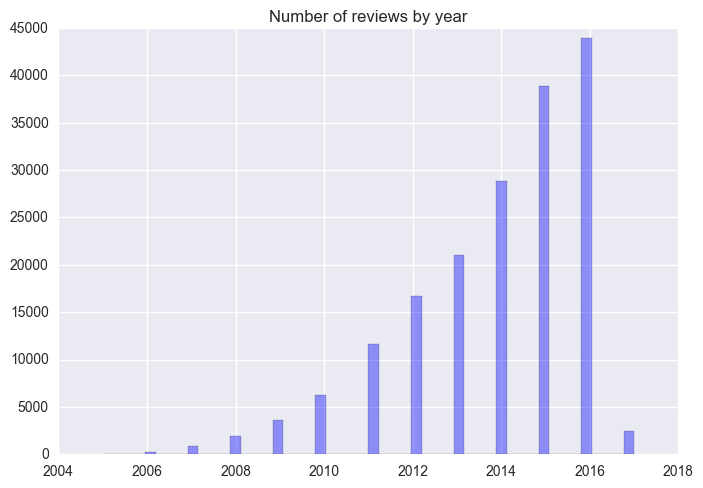

In [7]:
review_np = np.array(reviews_year)
g = sns.distplot(review_np, kde=False, color="b")
g.set_title("Number of reviews by year")
plt.show()

In [8]:
#add column to review df
reviews['Year'] = reviews_year

In [9]:
#for a specific business
business_id = 'lKom12WnYEjH5FFemK3M1Q'

business_reviews = reviews[reviews.business_id == business_id].groupby('Year').agg(pd.Series.sum)
business_reviews['Year'] = business_reviews.index
business_reviews

,review_id,business_id,stars,date,neighborhood,Year
Year,,,,,,
2005,k9Eyxp8enSJU2l39bW9sjQ,lKom12WnYEjH5FFemK3M1Q,5,2005-05-15,Strip District,2005
2006,16xy8LEXoTEsPf5Dt2hvGQ4Isset7d6m_2F_1fupeNZQBy...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,55,2006-11-232006-12-192006-05-012006-06-052006-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2006
2007,-BsnBR6IrLYaTqWMUZ1_5g0cMPRQj_JrdnxkvHaMd0IQ4N...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,64,2007-12-032007-09-082007-05-172007-01-082007-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2007
2008,2jUkR4GAsHyaKW-LbJriTQ7Z2Il5zcrrMFdiOxoRZgxAC3...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,76,2008-09-012008-07-242008-08-212008-07-232008-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2008
2009,-13Nl_dU6HpN1kdcLsVVBw-DO6X6o0qUfGN70buJDHOg0z...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,169,2009-07-092009-08-102009-08-222009-04-102009-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2009
2010,1gZTUcCr31Xp2ZshgEvELA2p1N_L8sfTU7Uo-eTdcUlA3C...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,312,2010-07-132010-07-072010-05-212010-01-032010-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2010
2011,-nOWOY_JDvLc4Xkl9nIYsA56p3orqBA4MXRk86TGTRIg59...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,274,2011-07-032011-08-052011-04-122011-01-072011-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2011
2012,-7X-5fyOJXvnjj7uxaV2KQ-oqYJIaFODm4Qe1dxKl0XA09...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,314,2012-08-212012-01-102012-08-082012-10-152012-0...,Strip DistrictStrip DistrictStrip DistrictStri...,2012
2013,-0JYe7X6NUzKY6P2IijS0Q-bN2H_lha2Txg2owGnOi2Q18...,lKom12WnYEjH5FFemK3M1QlKom12WnYEjH5FFemK3M1QlK...,391,2013-07-252013-05-192013-04-172013-06-152013-1...,Strip DistrictStrip DistrictStrip DistrictStri...,2013


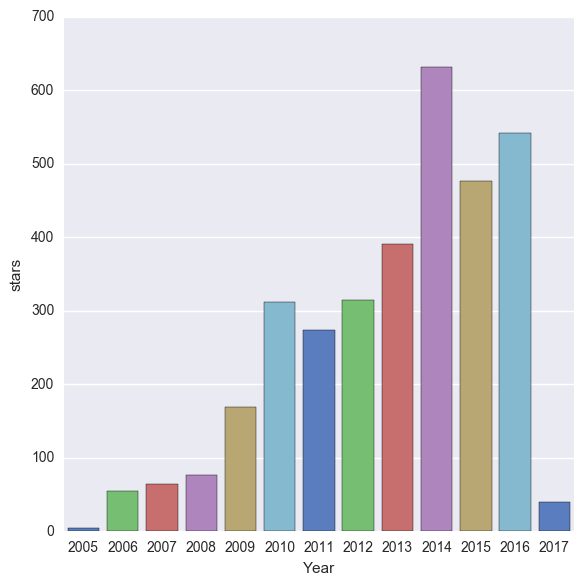

In [10]:
g = sns.factorplot(x="Year", y="stars", data=business_reviews, size=6, kind="bar", palette="muted")
plt.show()

In [11]:
#Get categories in Pittsburgh
query = "SELECT business_id, categories, stars FROM business WHERE CAST(postal_code AS int)>=15000 AND CAST(postal_code AS int)<15500"
categories = pd.read_sql_query(query, conn)
categories

,business_id,categories,stars
0,cnGIivYRLxpF7tBVR_JwWA,"['Hair Removal', 'Beauty & Spas', 'Blow Dry/Ou...",4.0
1,P3LisOj7DktgGa7C5FYpnA,"['Plumbing', 'Home Services']",4.0
2,93otbGHE0s0m-lU1osvg9w,"['American (New)', 'Pubs', 'Nightlife', 'Bars'...",3.0
3,csdZolWIWvkIHIqsCmV6sg,"['Hotels & Travel', 'Home Services', 'Hotels',...",2.0
4,kdjrQ2tuY4eqo4JZWIx50Q,"['Performing Arts', 'Arts & Entertainment']",3.5
5,h7ZW6c1Vi9V6_-gd2Ch_4g,"['Shopping', 'Mobile Phones']",2.0
6,CO7TpBuNFr_K0MTRaf9prw,"['Chocolatiers & Shops', 'Candy Stores', 'Dess...",5.0
7,HWrbZS1mxVRj2Y2VwMmDMg,"['Food', 'Bakeries']",4.5
8,jDqaz1jKdeWk_fTVCzc1Pg,"['Food', 'Imported Food', 'Restaurants', 'Ethn...",4.5
9,HYwbHY-srAOoH-t337DpMw,"['Tapas Bars', 'Restaurants']",2.0


In [23]:
cat_series = categories.categories
categories.categories == None

NameError: name 'which' is not defined

In [24]:
cat_string = ''
for i in range(0,len(cat_series)):
    try:
        categories.categories.ix[i]= re.sub(r"[\[\]' ]", "", cat_series[i]).lower()
    except:
        print("Value = None " + str(i))

Value = None
Value = None
Value = None
Value = None
Value = None
Value = None
Value = None
Value = None
Value = None
Value = None
Value = None


TypeError: data type not understood

In [30]:
categories_splitted = pd.concat([pd.Series(row['business_id'],row['categories'].split(',')) for _, row in categories.dropna().iterrows()]).reset_index()
categories_splitted

,index,0
0,hairremoval,cnGIivYRLxpF7tBVR_JwWA
1,beauty&spas,cnGIivYRLxpF7tBVR_JwWA
2,blowdry/outservices,cnGIivYRLxpF7tBVR_JwWA
3,hairstylists,cnGIivYRLxpF7tBVR_JwWA
4,hairextensions,cnGIivYRLxpF7tBVR_JwWA
5,massage,cnGIivYRLxpF7tBVR_JwWA
6,permanentmakeup,cnGIivYRLxpF7tBVR_JwWA
7,waxing,cnGIivYRLxpF7tBVR_JwWA
8,hairsalons,cnGIivYRLxpF7tBVR_JwWA
9,plumbing,P3LisOj7DktgGa7C5FYpnA


In [31]:
categories_splitted
categories_splitted.columns = ['Category', 'business_id']
category_count = categories_splitted.groupby('Category').count().sort_values("business_id",ascending = False)
category_count

,business_id
Category,
restaurants,3097
food,1326
shopping,1163
nightlife,754
bars,703
beauty&spas,652
pizza,604
american(traditional),509
automotive,493


In [169]:
topCategories = category_count[category_count.business_id>10]
len(topCategories)

285

In [170]:
indices = [categories_splitted.Category[i] in topCategories.index for i in range(0,len(categories_splitted.Category))]

In [171]:
len(categories_splitted[indices].groupby('business_id'))

7781

In [176]:
grid_search = range(5, 1000, 5)
rest_thresh = []

for g in grid_search:
    print(g)
    topCat = category_count[category_count.business_id>g]
    numCat = len(topCat)
    indices = [categories_splitted.Category[i] in topCat.index for i in range(0,len(categories_splitted.Category))]
    numRest = len(categories_splitted[indices].groupby('business_id'))
    valG = [g, numCat, numRest]
    rest_thresh.append(valG)
rest_thresh

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995


[[5, 391, 7789],
 [10, 285, 7781],
 [15, 231, 7781],
 [20, 196, 7764],
 [25, 179, 7764],
 [30, 160, 7764],
 [35, 142, 7764],
 [40, 134, 7764],
 [45, 116, 7736],
 [50, 109, 7736],
 [55, 101, 7736],
 [60, 92, 7719],
 [65, 84, 7704],
 [70, 77, 7704],
 [75, 71, 7686],
 [80, 66, 7640],
 [85, 64, 7640],
 [90, 62, 7640],
 [95, 57, 7640],
 [100, 54, 7640],
 [105, 51, 7640],
 [110, 48, 7640],
 [115, 46, 7640],
 [120, 42, 7640],
 [125, 41, 7640],
 [130, 38, 7640],
 [135, 37, 7640],
 [140, 37, 7640],
 [145, 36, 7640],
 [150, 34, 7640],
 [155, 33, 7640],
 [160, 32, 7640],
 [165, 31, 7483],
 [170, 31, 7483],
 [175, 30, 7483],
 [180, 29, 7483],
 [185, 29, 7483],
 [190, 29, 7483],
 [195, 29, 7483],
 [200, 28, 7483],
 [205, 26, 7483],
 [210, 26, 7483],
 [215, 26, 7483],
 [220, 25, 7483],
 [225, 24, 7483],
 [230, 24, 7483],
 [235, 23, 7483],
 [240, 22, 7483],
 [245, 22, 7483],
 [250, 22, 7483],
 [255, 22, 7483],
 [260, 22, 7483],
 [265, 20, 7320],
 [270, 20, 7320],
 [275, 19, 7320],
 [280, 19, 7320],
 

In [180]:
rest_thresh_df = pd.DataFrame(rest_thresh)
rest_thresh_df.columns = ['Threshold', 'NumCat', 'NumRest']
rest_thresh_df

,Threshold,NumCat,NumRest
0,5,391,7789
1,10,285,7781
2,15,231,7781
3,20,196,7764
4,25,179,7764
5,30,160,7764
6,35,142,7764
7,40,134,7764
8,45,116,7736
9,50,109,7736


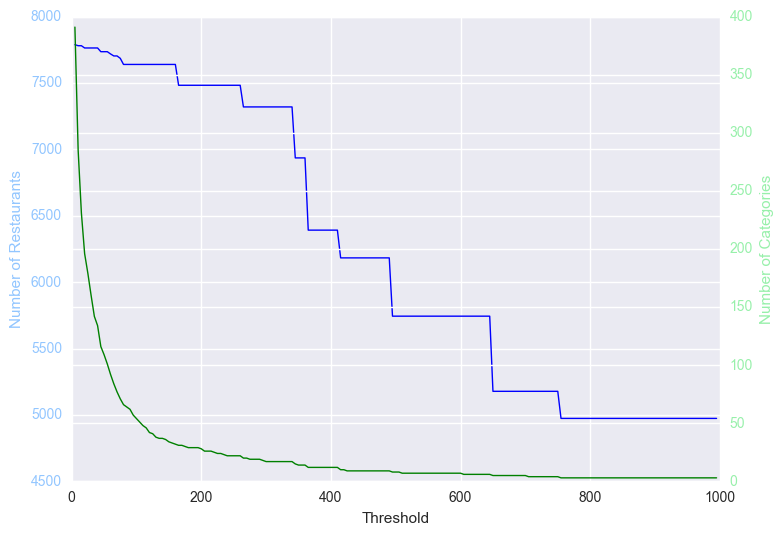

In [199]:
fig, ax1 = plt.subplots()
ax1.plot(rest_thresh_df.Threshold, rest_thresh_df.NumRest, color="blue", linewidth=1.0, linestyle="-")
ax1.set_xlabel('Threshold')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of Restaurants', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(rest_thresh_df.Threshold, rest_thresh_df.NumCat, color="green", linewidth=1.0, linestyle="-")
ax2.set_ylabel('Number of Categories', color='g')
ax2.tick_params('y', colors='g')

fig.tight_layout()
plt.show()


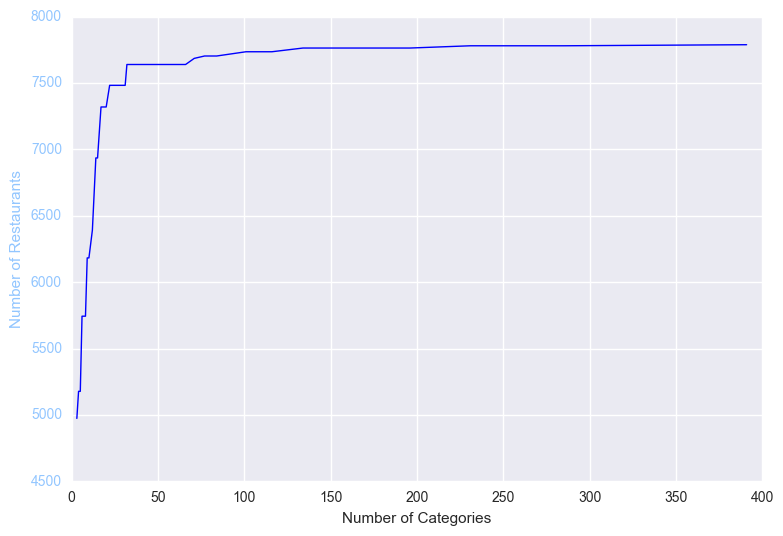

In [205]:
fig, ax1 = plt.subplots()
ax1.plot(rest_thresh_df.NumCat, rest_thresh_df.NumRest, color="blue", linewidth=1.0, linestyle="-")
ax1.set_xlabel('Number of Categories')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Number of Restaurants', color='b')
ax1.tick_params('y', colors='b')

fig.tight_layout()

plt.show()

This may give us the categories to capture most restaurants, but not the ones with the highest variance. Maybe we can use all the features and then apply MSD or Lasso when training

In [32]:
#One-Hot Encoding of the categories
cat_ohe = pd.get_dummies(categories_splitted, columns = ["Category"]).groupby("business_id").sum()
cat_ohe

,"Category_""childrensclothing""","Category_""childrensmuseums""","Category_""mensclothing""","Category_""menshairsalons""","Category_""womensclothing""",Category_&probates,Category_accessories,Category_accountants,Category_activelife,Category_acupuncture,...,Category_wine&spirits,Category_winebars,Category_wineries,Category_winetastingclasses,Category_winetastingroom,Category_winetours,Category_wraps,Category_yelpevents,Category_yoga,Category_zoos
business_id,,,,,,,,,,,,,,,,,,,,,
--GM_ORV2cYS-h38DSaCLw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--cgVkbWTiga3OYTkymKqA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--cjBEbXMI2obtaRHNSFrA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--ujyvoQlwVoBgMYtADiLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
--wIGbLEhlpl_UeAIyDmZQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0dWjxaPKrXAn8urSnkSLA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-0nEqS3_A_nnUut4DrEPEg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
-1G5n-Pnu3I7gjh7-_VRxw,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-1PwcnMwaztBRKah7lrWBg,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#Pickle the file
import pickle
output_file = open("Business_Categories.dat","wb")
pickle.dump(cat_ohe, output_file)
output_file.close()


In [35]:
example = cat_ohe.ix[0]
[example.index[i] for i in range(0,len(cat_ohe.columns)) if example[i] == 1]

[u'Category_chickenwings',
 u'Category_pizza',
 u'Category_restaurants',
 u'Category_salad']

In [61]:
#Extract colors by stars
colors_df = pd.DataFrame(columns = ["Stars"])
colors_df = pd.concat([categories[categories.business_id == business]['stars'] for business in cat_ohe.index])

In [64]:
colors_df.index = cat_ohe.index

In [65]:
colors_df

business_id
--GM_ORV2cYS-h38DSaCLw    3.5
--cgVkbWTiga3OYTkymKqA    5.0
--cjBEbXMI2obtaRHNSFrA    3.0
--ujyvoQlwVoBgMYtADiLA    4.0
--wIGbLEhlpl_UeAIyDmZQ    5.0
-0dWjxaPKrXAn8urSnkSLA    3.0
-0nEqS3_A_nnUut4DrEPEg    5.0
-1G5n-Pnu3I7gjh7-_VRxw    4.5
-1PwcnMwaztBRKah7lrWBg    4.0
-1fwceFQw5NAemdPRrhP0g    3.0
-1xCh7Cocn6IwFzhELyohA    2.0
-20P7Av7rbvx1DEb9k7PjQ    3.5
-2Mwx1Mp10HTLlazfCBKdA    4.5
-382X_bWhJKPJKP1VfXOmw    2.0
-3rvpkYkYD_N1IP4hSvD0A    3.5
-40RDS4F54qiGiEQUsZaXA    3.5
-54Q9l7rRbnKxrDukgNmnw    4.0
-59qsDRpa1NQLcg1y6zuPg    4.5
-5CXrj2zoTVcZG9NdCtJaw    5.0
-7H-oXvCxJzuT42ky6Db0g    3.5
-7PX_FOoCwktlunImRyZdg    4.5
-7bvsSGKnY6O-JmSWc5V6g    4.5
-7teXSpi9nqy58WUd-8yfw    4.5
-8ILwSisSrTzcyy_Z0o9oA    3.5
-9BiAtHCxKI3fXDJ6On5Dg    5.0
-9lOQ0Lfm8wiu8eSdUXS8A    3.5
-ACp6Qv866UuTD6UhTNWTA    4.0
-AFMB0nVx0kVlbi73ir0Tw    2.5
-AtzcXIwEP6yO7rM9CM9ww    4.0
-BuZrOMqgO4OU_UKYSddAg    3.0
                         ... 
zmgQwXC4ojfk4L0ywvXOOw    3.0
zmoQ2eIDyeKlKVGA8p9esQ    3.

LLE: 61 sec
Isomap: 96 sec
MDS: 2.8e+02 sec


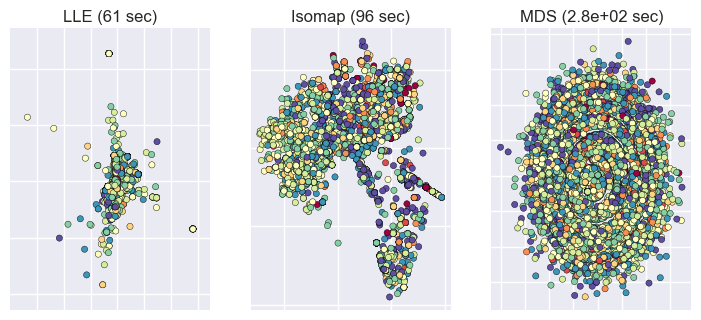

In [77]:
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets
# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = len(cat_ohe)
X = cat_ohe
color = colors_df
n_neighbors = 10
n_components = 2

fig = plt.figure(figsize=(15, 8))

t0 = time()
Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components,eigen_solver='auto', method='standard').fit_transform(X)
t1 = time()
print("LLE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(256)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("LLE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

In [80]:
%%HTML
<div class='tableauPlaceholder' id='viz1490730893107' style='position: relative'><noscript><a href='#'><img alt='Sheet 1 ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P5&#47;P59GKZKCB&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='path' value='shared&#47;P59GKZKCB' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;P5&#47;P59GKZKCB&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1490730893107');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

In [226]:
from sklearn.decomposition import KernelPCA

X = cat_ohe

kpca = KernelPCA(n_components= 2, kernel="rbf", fit_inverse_transform=True, gamma=1)
X_kpca = kpca.fit_transform(X)

array([[ 0.03077873, -0.01089039],
       [ 0.03115397, -0.01117775],
       [ 0.03029226, -0.01052947],
       ..., 
       [ 0.03115397, -0.01117775],
       [ 0.03128109, -0.01127693],
       [ 0.04759391, -0.04428673]])

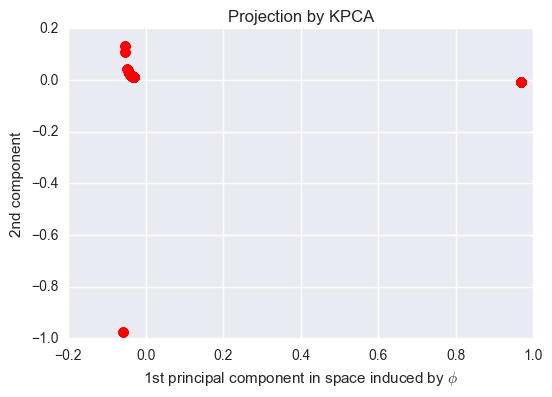

In [101]:
plt.plot(X_kpca[:, 0], X_kpca[:, 1], "ro")
#plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

[array([ 0.06434672, -0.06958008, -0.06524269, ..., -0.06937709,
         0.38444204, -0.07514225]), array([[-0.06231663,  0.02192963],
        [-0.06904741,  0.02024814],
        [-0.05630627,  0.01661079],
        ..., 
        [-0.07157704,  0.03054482],
        [-0.05667023,  0.04161966],
        [ 0.1717683 , -0.42658531]])]

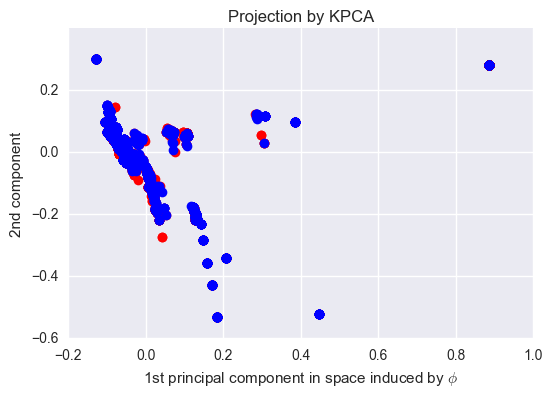

In [231]:
reds = colors_df<4
blues = colors_df>=4

plt.plot(X_kpca[reds, 0], X_kpca[reds, 1], "ro")
plt.plot(X_kpca[blues, 0], X_kpca[blues, 1], "bo")
plt.title("Projection by KPCA")
plt.xlabel("1st principal component in space induced by $\phi$")
plt.ylabel("2nd component")

[X_kpca[reds,0], X_kpca[blues]]

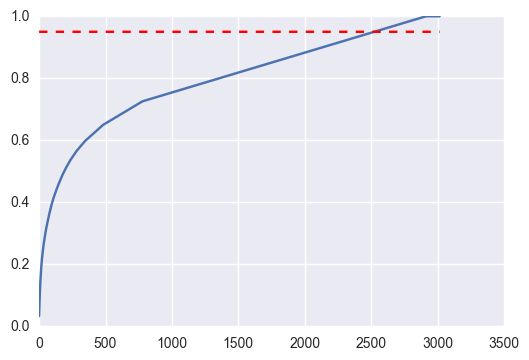

In [138]:
import numpy as np
explained_variance = np.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
plt.plot(np.cumsum(explained_variance_ratio))

horiz_line_data = np.array([0.95 for i in xrange(len(explained_variance_ratio))])
plt.plot(xrange(len(explained_variance_ratio)), horiz_line_data, 'r--') 

In [140]:
category_variance = cat_ohe.var(axis = 0).sort_values(ascending = False)
category_variance_ratio = category_variance / np.sum(category_variance)
category_variance_ratio

Category_restaurants                0.071877
Category_food                       0.042364
Category_shopping                   0.038092
Category_nightlife                  0.026217
Category_bars                       0.024621
Category_beauty&spas                0.022999
Category_pizza                      0.021449
Category_american(traditional)      0.018314
Category_automotive                 0.017777
Category_sandwiches                 0.015330
Category_eventplanning&services     0.015090
Category_american(new)              0.015090
Category_activelife                 0.013322
Category_homeservices               0.013253
Category_italian                    0.012833
Category_health&medical             0.012692
Category_localservices              0.012552
Category_fashion                    0.011032
Category_coffee&tea                 0.010926
Category_autorepair                 0.010069
Category_hotels&travel              0.009782
Category_arts&entertainment         0.009782
Category_h

In [150]:
top_variance_features_ratio = np.cumsum(category_variance_ratio)<0.95
top_variance_features = category_variance_ratio.index[top_variance_features_ratio]
top_variance_features

Index([u'Category_restaurants', u'Category_food', u'Category_shopping',
       u'Category_nightlife', u'Category_bars', u'Category_beauty&spas',
       u'Category_pizza', u'Category_american(traditional)',
       u'Category_automotive', u'Category_sandwiches',
       ...
       u'Category_orthodontists', u'Category_masonry/concrete',
       u'Category_landscaping', u'Category_cyclingclasses',
       u'Category_playgrounds', u'Category_vinylrecords',
       u'Category_adultentertainment', u'Category_fish&chips',
       u'Category_foodstands', u'Category_airlines'],
      dtype='object', length=323)

In [153]:
categories_topVariance = cat_ohe[top_variance_features]
output_file = open("Business_Categories_topVariance.dat","wb")
pickle.dump(categories_topVariance, output_file)
output_file.close()

In [3]:
#Get attributes in Pittsburgh
query = "SELECT business_id, attributes FROM business WHERE CAST(postal_code AS int)>=15000 AND CAST(postal_code AS int)<15500"
attributes = pd.read_sql_query(query, conn)
attributes

,business_id,attributes
0,cnGIivYRLxpF7tBVR_JwWA,"['AcceptsInsurance: False', 'BusinessAcceptsCr..."
1,P3LisOj7DktgGa7C5FYpnA,['BusinessAcceptsCreditCards: True']
2,93otbGHE0s0m-lU1osvg9w,"['Alcohol: full_bar', ""Ambience: {'romantic': ..."
3,csdZolWIWvkIHIqsCmV6sg,"['BusinessAcceptsCreditCards: True', 'ByAppoin..."
4,kdjrQ2tuY4eqo4JZWIx50Q,['GoodForKids: False']
5,h7ZW6c1Vi9V6_-gd2Ch_4g,"['BusinessAcceptsCreditCards: True', ""Business..."
6,CO7TpBuNFr_K0MTRaf9prw,"['BikeParking: False', 'BusinessAcceptsCreditC..."
7,HWrbZS1mxVRj2Y2VwMmDMg,"['BikeParking: True', 'BusinessAcceptsCreditCa..."
8,jDqaz1jKdeWk_fTVCzc1Pg,"['BikeParking: True', 'BusinessAcceptsCreditCa..."
9,HYwbHY-srAOoH-t337DpMw,"['Alcohol: full_bar', 'BYOB: False', 'BYOBCork..."


In [4]:
attributes_splitted = pd.concat([pd.Series(row['business_id'],row['attributes'].split(',')) for _, row in attributes.dropna().iterrows()]).reset_index()
attributes_splitted.columns = ['Attributes', 'business_id']
attributes_count = attributes_splitted.groupby('Attributes').count().sort_values("business_id",ascending = False)
attributes_count

,business_id
Attributes,
'validated': False,5100
"'valet': False}""",4977
"""BusinessParking: {'garage': False",4811
'BusinessAcceptsCreditCards: True',4416
'lot': False,3617
'street': False,3404
'RestaurantsAttire: casual',2652
'touristy': False,2606
'upscale': False,2587


In [41]:
for i in range(0,len(attributes_splitted)):
    try:
        attributes_splitted.Attributes.ix[i]= re.sub(r"[\[\]' ]", "", attributes_splitted.Attributes[i]).lower()
    except:
        print("Value = None " + str(i))

In [49]:
restPrice = attributes_splitted[attributes_splitted.Attributes.str.contains("restaurantspricerange", case=False)]
restPrice.groupby('Attributes').count()

,business_id
Attributes,
restaurantspricerange2:1,1945
restaurantspricerange2:2,2882
restaurantspricerange2:3,494
restaurantspricerange2:4,78


In [52]:
attributes_count = attributes_splitted.groupby('Attributes').count().sort_values("business_id",ascending = False)
attributes_count

,business_id
Attributes,
businessacceptscreditcards:true,5942
validated:false,5100
"valet:false}""",5053
"""businessparking:{garage:false",4869
lot:false,3617
street:false,3404
restaurantstakeout:true,3077
bikeparking:true,2979
restaurantspricerange2:2,2882


In [55]:
hipster = attributes_splitted[attributes_splitted.Attributes.str.contains("upscale", case=False)]
hipster.groupby('Attributes').count()

,business_id
Attributes,
upscale:false,2587
upscale:true,21


In [63]:
query = "SELECT b.business_id, r.stars, attributes, date, useful, cool, funny, postal_code FROM review r JOIN business b USING (business_id) WHERE CAST(postal_code AS int)>=15000 AND CAST(postal_code AS int)<15500"
business_data = pd.read_sql_query(query,conn)
business_data

,business_id,stars,attributes,date,useful,cool,funny,postal_code
0,cnGIivYRLxpF7tBVR_JwWA,1,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-02-01,0,0,0,15071
1,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-04,0,0,0,15071
2,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-07-28,0,0,0,15071
3,cnGIivYRLxpF7tBVR_JwWA,5,"['AcceptsInsurance: False', 'BusinessAcceptsCr...",2016-08-06,0,0,0,15071
4,P3LisOj7DktgGa7C5FYpnA,1,['BusinessAcceptsCreditCards: True'],2015-09-19,4,0,0,15237
5,P3LisOj7DktgGa7C5FYpnA,2,['BusinessAcceptsCreditCards: True'],2014-01-29,4,1,0,15237
6,P3LisOj7DktgGa7C5FYpnA,3,['BusinessAcceptsCreditCards: True'],2016-12-05,0,0,0,15237
7,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2011-11-19,2,0,0,15237
8,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2013-10-05,0,0,0,15237
9,P3LisOj7DktgGa7C5FYpnA,5,['BusinessAcceptsCreditCards: True'],2014-01-12,2,0,0,15237


In [64]:
restprice = attributes_splitted[attributes_splitted.Attributes.str.contains("restaurantspricerange", case=False)].reset_index()

In [71]:
restprice['Price'] = [r.split(":")[1] for r in restprice.Attributes]

In [75]:
restprice[restprice.business_id == 'cnGIivYRLxpF7tBVR_JwWA']

,index,Attributes,business_id,Price
0,16,restaurantspricerange2:3,cnGIivYRLxpF7tBVR_JwWA,3


In [83]:
business_withPrice = business_data
business_withPrice.attributes = [restprice[restprice.business_id == b].Price for b in business_data.business_id]

In [84]:
business_withPrice

,business_id,stars,attributes,date,useful,cool,funny,postal_code
0,cnGIivYRLxpF7tBVR_JwWA,1,"0 3 Name: Price, dtype: object",2016-02-01,0,0,0,15071
1,cnGIivYRLxpF7tBVR_JwWA,5,"0 3 Name: Price, dtype: object",2016-07-04,0,0,0,15071
2,cnGIivYRLxpF7tBVR_JwWA,5,"0 3 Name: Price, dtype: object",2016-07-28,0,0,0,15071
3,cnGIivYRLxpF7tBVR_JwWA,5,"0 3 Name: Price, dtype: object",2016-08-06,0,0,0,15071
4,P3LisOj7DktgGa7C5FYpnA,1,"Series([], Name: Price, dtype: object)",2015-09-19,4,0,0,15237
5,P3LisOj7DktgGa7C5FYpnA,2,"Series([], Name: Price, dtype: object)",2014-01-29,4,1,0,15237
6,P3LisOj7DktgGa7C5FYpnA,3,"Series([], Name: Price, dtype: object)",2016-12-05,0,0,0,15237
7,P3LisOj7DktgGa7C5FYpnA,5,"Series([], Name: Price, dtype: object)",2011-11-19,2,0,0,15237
8,P3LisOj7DktgGa7C5FYpnA,5,"Series([], Name: Price, dtype: object)",2013-10-05,0,0,0,15237
9,P3LisOj7DktgGa7C5FYpnA,5,"Series([], Name: Price, dtype: object)",2014-01-12,2,0,0,15237


In [81]:
restprice

,index,Attributes,business_id,Price
0,16,restaurantspricerange2:3,cnGIivYRLxpF7tBVR_JwWA,3
1,66,restaurantspricerange2:2,93otbGHE0s0m-lU1osvg9w,2
2,83,restaurantspricerange2:4,h7ZW6c1Vi9V6_-gd2Ch_4g,4
3,93,restaurantspricerange2:2,CO7TpBuNFr_K0MTRaf9prw,2
4,103,restaurantspricerange2:1,HWrbZS1mxVRj2Y2VwMmDMg,1
5,119,restaurantspricerange2:1,jDqaz1jKdeWk_fTVCzc1Pg,1
6,145,restaurantspricerange2:3,HYwbHY-srAOoH-t337DpMw,3
7,175,restaurantspricerange2:2,ZYof0WYlilJ3pgWNSgmYKQ,2
8,193,restaurantspricerange2:4,u7CxxEzx8hvjoJ8onN4zTg,4
9,213,restaurantspricerange2:2,NiJULy6qplcpmuWmof5Hgg,2
